In [10]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

datastore = h5py.File('trials6.h5', 'r')
batch_size = 100
n_comp = 40

raw_I = np.array(datastore["I"])
raw_T = np.array(datastore["T"])
raw_c = np.array(datastore["c"])


/var/folders/gc/0752xrm56pnf0r0dsrn5370c0000gr/T/ipykernel_1117/2725131216.py:11: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  raw_I = np.array(datastore["I"])
/var/folders/gc/0752xrm56pnf0r0dsrn5370c0000gr/T/ipykernel_1117/2725131216.py:12: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  raw_T = np.array(datastore["T"])
/var/folders/gc/0752xrm56pnf0r0dsrn5370c0000gr/T/ipykernel_1117/2725131216.py:13: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  raw_c = np.array(datastore["c"])


In [20]:
pcac = PCA(n_components=10)
pcac.fit(raw_c)
pcac.explained_variance_ratio_

array([8.7634909e-01, 9.0763792e-02, 2.0733241e-02, 6.6792169e-03,
       2.7909982e-03, 1.2695813e-03, 6.4035767e-04, 3.3378563e-04,
       1.8258771e-04, 1.0244137e-04], dtype=float32)

In [4]:
c = pcac.transform(raw_c)
c.shape

(40000, 12)

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(c)

KMeans(n_clusters=2)

In [44]:
from sklearn.metrics import silhouette_score, silhouette_samples
sil = pd.Series(silhouette_samples(c, kmeans.labels_))

In [45]:
lbl = pd.Series(kmeans.labels_)
lbl.value_counts()

1    20898
0    19102
dtype: int64

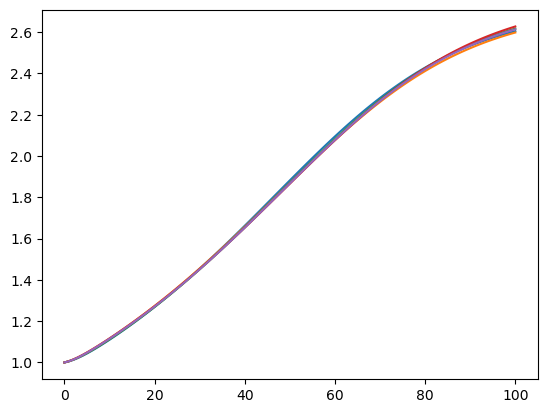

In [76]:
plt.plot(raw_c[lbl == 77][:5].T);

In [29]:
pd.Series(sil).groupby(lbl).median()

0    0.357595
1    0.222510
2    0.413184
3    0.755734
4    0.370514
dtype: float32

In [41]:
pd.Series(sil).groupby(lbl).median()

0    0.376533
1    0.432504
2    0.753733
3    0.303699
dtype: float32

In [46]:
pd.Series(sil).groupby(lbl).median()

0    0.530990
1    0.730109
dtype: float32

In [65]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1)
dbscan.fit(raw_c)
lbl = pd.Series(dbscan.labels_)
lbl.value_counts()

-1     31256
 0      7274
 1       555
 4        69
 3        35
       ...  
 86        5
 98        4
 64        4
 63        4
 66        4
Length: 104, dtype: int64

In [75]:
lbl.value_counts()[-15:]

/var/folders/gc/0752xrm56pnf0r0dsrn5370c0000gr/T/ipykernel_1117/1828025967.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  lbl.value_counts()[-15:]


73     5
20     5
77     5
90     5
67     5
92     5
60     5
101    5
55     5
80     5
86     5
98     4
64     4
63     4
66     4
dtype: int64